Niall Carbery 22380966


1. What is the best kernel? (Common options include a linear kernel, an RBF kernel)
2. What are the metrics of successful classification?
3. What is the minimum amount of the training data subset should you allocate for a successful classification?


In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
data1 = np.loadtxt("./Homework_Datasets/Takeda_2021_Supplementary_Fig2b.csv", delimiter=",", skiprows=1)
waiting_time1 = data1[:, 0]
probability1 = data1[:, 1]

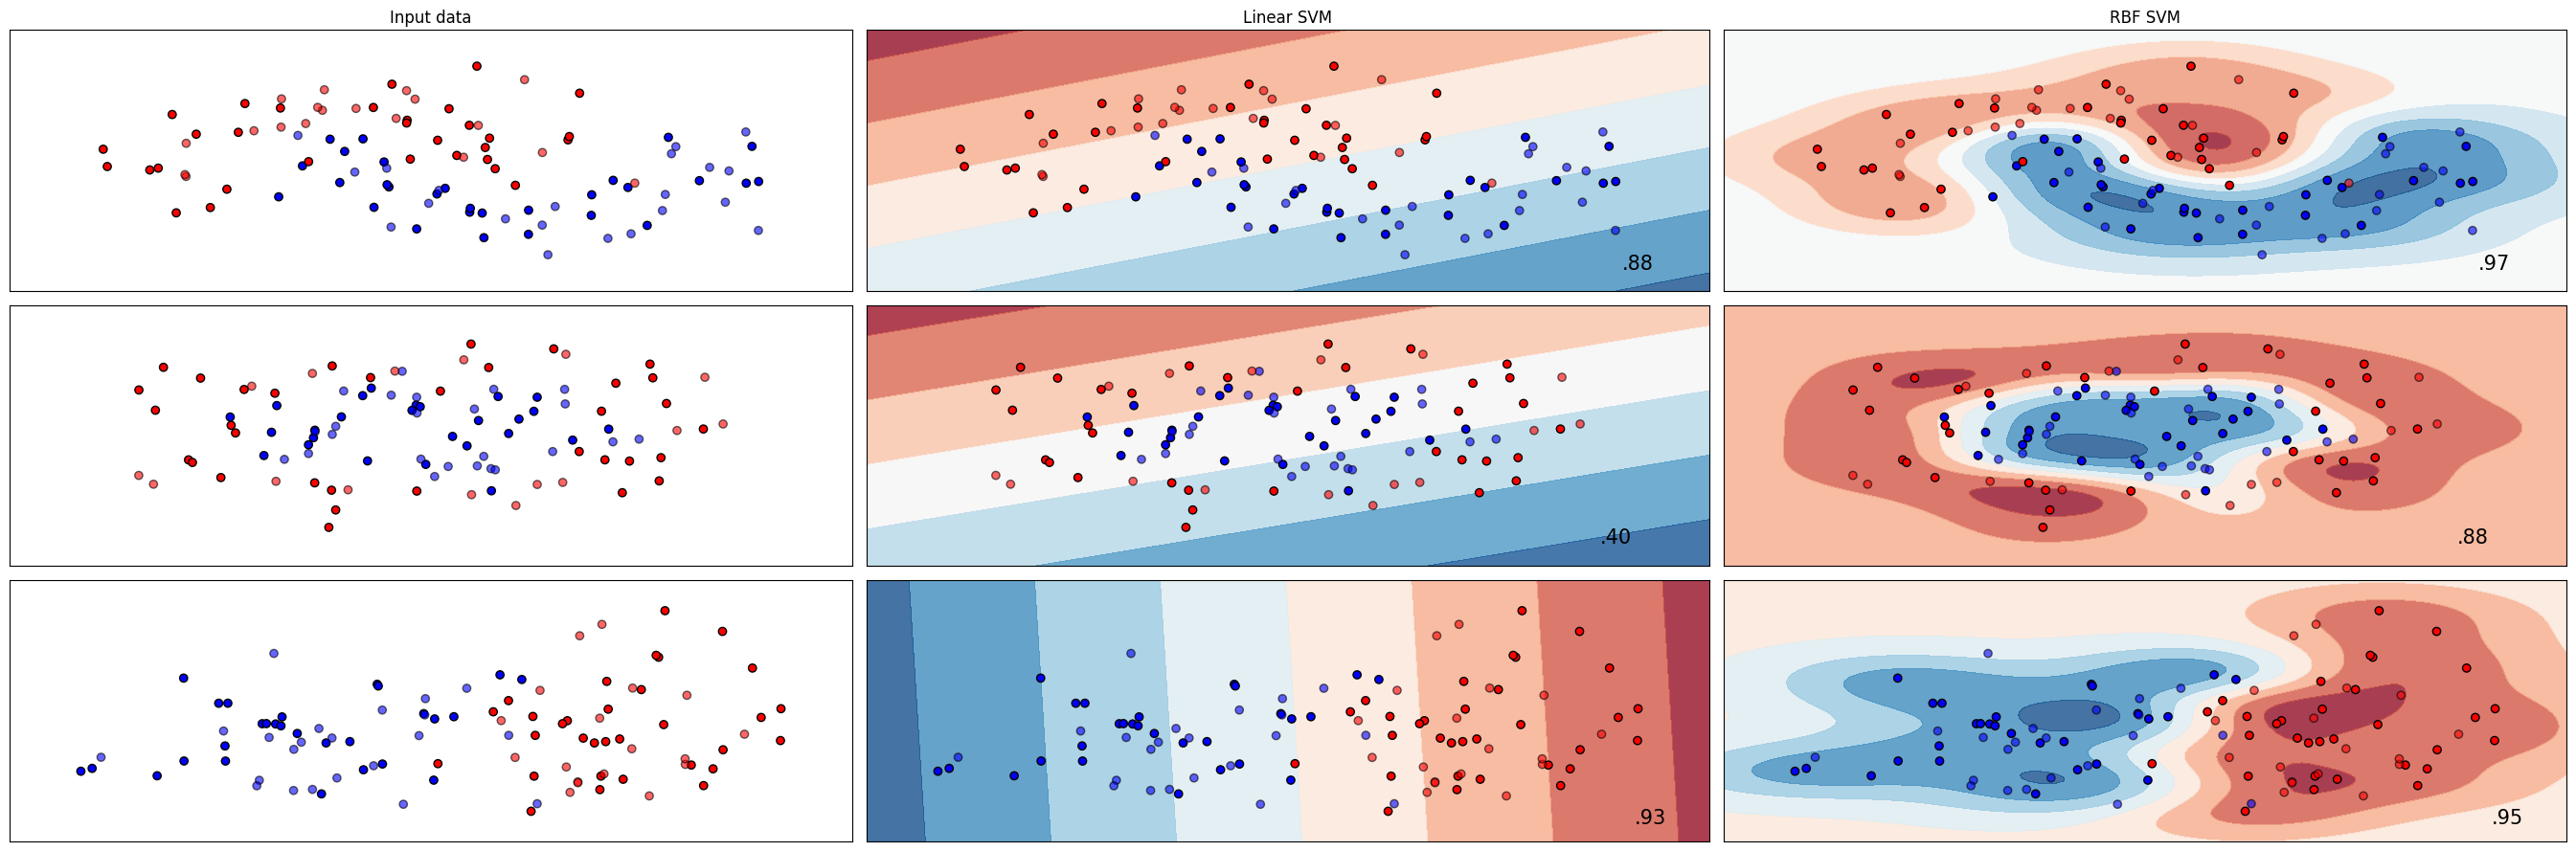

In [65]:
# Let's use more involved data sets from scikit-learn
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

names = [
    "Linear SVM",
    "RBF SVM",
]

classifiers = [
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        # Ensure you scale and standardise your data!
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

In [66]:
df1 = pd.read_csv("./Homework_Datasets/o2Saturation.csv")
df2 = pd.read_csv('./Homework_Datasets/heart.csv')

In [67]:
X = df2.drop('output', axis=1)
y = df2['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

svc = SVC()
svc.fit(X_train, y_train.values.ravel())

# Make predictions on the test data
svc_pred = svc.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

[[19 22]
 [ 5 45]]
              precision    recall  f1-score   support

           0       0.79      0.46      0.58        41
           1       0.67      0.90      0.77        50

    accuracy                           0.70        91
   macro avg       0.73      0.68      0.68        91
weighted avg       0.73      0.70      0.69        91



In [68]:
from sklearn.model_selection import GridSearchCV

# Define the grid of parameters to search
params_grid = {
    'C': [0.05, 0.1, 0.5, 1, 10],
    'kernel': ['poly', 'rbf', 'sigmoid']
}

# Create an SVC model
model = SVC()

# Define a GridSearchCV to search the best parameters
grid_search = GridSearchCV(estimator = model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)

# Search the best parameters with training data
grid_search.fit(X_train, y_train.values.ravel())

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 15 candidates, totalling 75 fits


{'C': 0.5, 'kernel': 'rbf'}

In [69]:
# Retraining an SVC model with the best parameters
best_svc = SVC(C=0.1, kernel='sigmoid')
best_svc.fit(X_train, y_train.values.ravel())

# Make predictions on the test data
svc_pred = best_svc.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

[[ 0 41]
 [ 0 50]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.55      1.00      0.71        50

    accuracy                           0.55        91
   macro avg       0.27      0.50      0.35        91
weighted avg       0.30      0.55      0.39        91



/home/niall/Quantum-Computing/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/niall/Quantum-Computing/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/niall/Quantum-Computing/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita